In [1]:
# Import Tensorflow and create a graph session
import tensorflow as tf
sess = tf.Session()

In [2]:
# Declare variables
a = tf.Variable(tf.constant(4.))
# Input value
x_val = 5.
# Create a placeholder
x_data = tf.placeholder(dtype=tf.float32)

In [3]:
# Add operation to the computational graph
multiply = tf.multiply(a, x_data)

In [4]:
# Declare loss function as L2 distance between output and desired value
loss = tf.square(tf.subtract(multiply, 50.))

In [5]:
# Initialize model variable
init = tf.initialize_all_variables()
# run the session
sess.run(init)
# What optimizer you want to use
optim = tf.train.GradientDescentOptimizer(0.01)
# train the step
train_step = optim.minimize(loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


## Optmizing the model

We will now optimize the model towards the desired value of 100. We are doing this by constantly feeding in the input 5 and backpropagate the loss to update the model varialbe towards the value.

In [8]:
print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiply, feed_dict={x_data: x_val})
print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
9.99999 * 5.0 = 50.0


In [10]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [12]:
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)
two_gate = tf.add(tf.multiply(a, x_data), b)
loss = tf.square(tf.subtract(two_gate, 50.))

optim = tf.train.GradientDescentOptimizer(0.01)
train_step = optim.minimize(loss)


In [13]:
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    # Run the train step
    sess.run(train_step, feed_dict={x_data: x_val})
    # Get the a and b values
    a_val, b_val = (sess.run(a), sess.run(b))
    # Run the two-gate graph output
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
9.45605 * 5.0 + 2.69121 = 49.9714


## Gates and Activation Functions

$$sigmoid(x) = {1 \over{1 + e^x}}$$

$$ReLU(x) = max(0, x)$$

In [26]:
ops.reset_default_graph()
sess = tf.Session()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [28]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1, 1]))
b1 = tf.Variable(tf.random_uniform(shape=[1, 1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [29]:
# declare models
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [30]:
# Loss function avg L2 norm
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [31]:
# Optimizer
optim = tf.train.GradientDescentOptimizer(0.01)
train_sigmoid = optim.minimize(loss1)
train_relu = optim.minimize(loss2)
init = tf.global_variables_initializer()
sess.run(init)

In [32]:
# We do 1000 iterations of our training for both models. Also, we'll save loss output and activation output
# for plotting purposes
lossvec_sigmoid = []
lossvec_relu = []
activation_sigmoid = []
activation_relu = []

# We loop
for i in range(1000):
    random_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[random_indices]])
    sess.run(train_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_relu, feed_dict={x_data: x_vals})
    lossvec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    lossvec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))

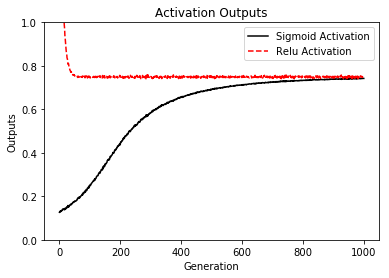

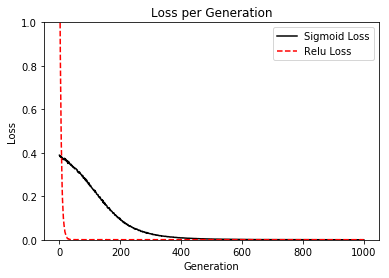

In [33]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(lossvec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(lossvec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Make a 1-layer Neural Network


In [ ]:
# Reset stuff and computation graph
ops.reset_default_graph()
sess = tf.Session()

In [11]:
# Restarted ther Jupyter Notebook Kernel here
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [12]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [13]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)
sess = tf.Session()

In [14]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False) # create a 80:20 split
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [15]:
# Batchsize, placeholder
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [16]:
# Declare model variables with appropriate size and hidden layer nodes
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [17]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [18]:
# RMSE as loss function
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [19]:
# Optimizer and initialize variables
optim = tf.train.GradientDescentOptimizer(0.005)
train_step = optim.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
# Loop through 1000 training iterations
# initialize first loss vectors for storage
# First we initialize the loss vectors for storage.
loss_vec = []
test_loss = []
for i in range(1000):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 2.2276
Generation: 100. Loss = 1.9738
Generation: 150. Loss = 2.455
Generation: 200. Loss = 2.1724
Generation: 250. Loss = 1.9766
Generation: 300. Loss = 2.7586
Generation: 350. Loss = 1.7948
Generation: 400. Loss = 1.5586
Generation: 450. Loss = 2.1508
Generation: 500. Loss = 2.0444
Generation: 550. Loss = 2.187
Generation: 600. Loss = 1.8448
Generation: 650. Loss = 2.2678
Generation: 700. Loss = 1.9504
Generation: 750. Loss = 2.3048
Generation: 800. Loss = 1.8684
Generation: 850. Loss = 1.833
Generation: 900. Loss = 1.9504
Generation: 950. Loss = 2.5096
Generation: 1000. Loss = 2.108


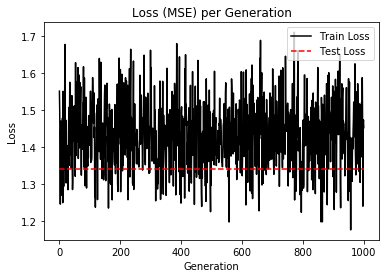

In [21]:
# Plot the stuff
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()